In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000


In [3]:
data = pd.read_csv('Country-data (1).csv')
df = data.copy()
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
column_names=df.columns

In [10]:
range(len(column_names))

range(0, 10)

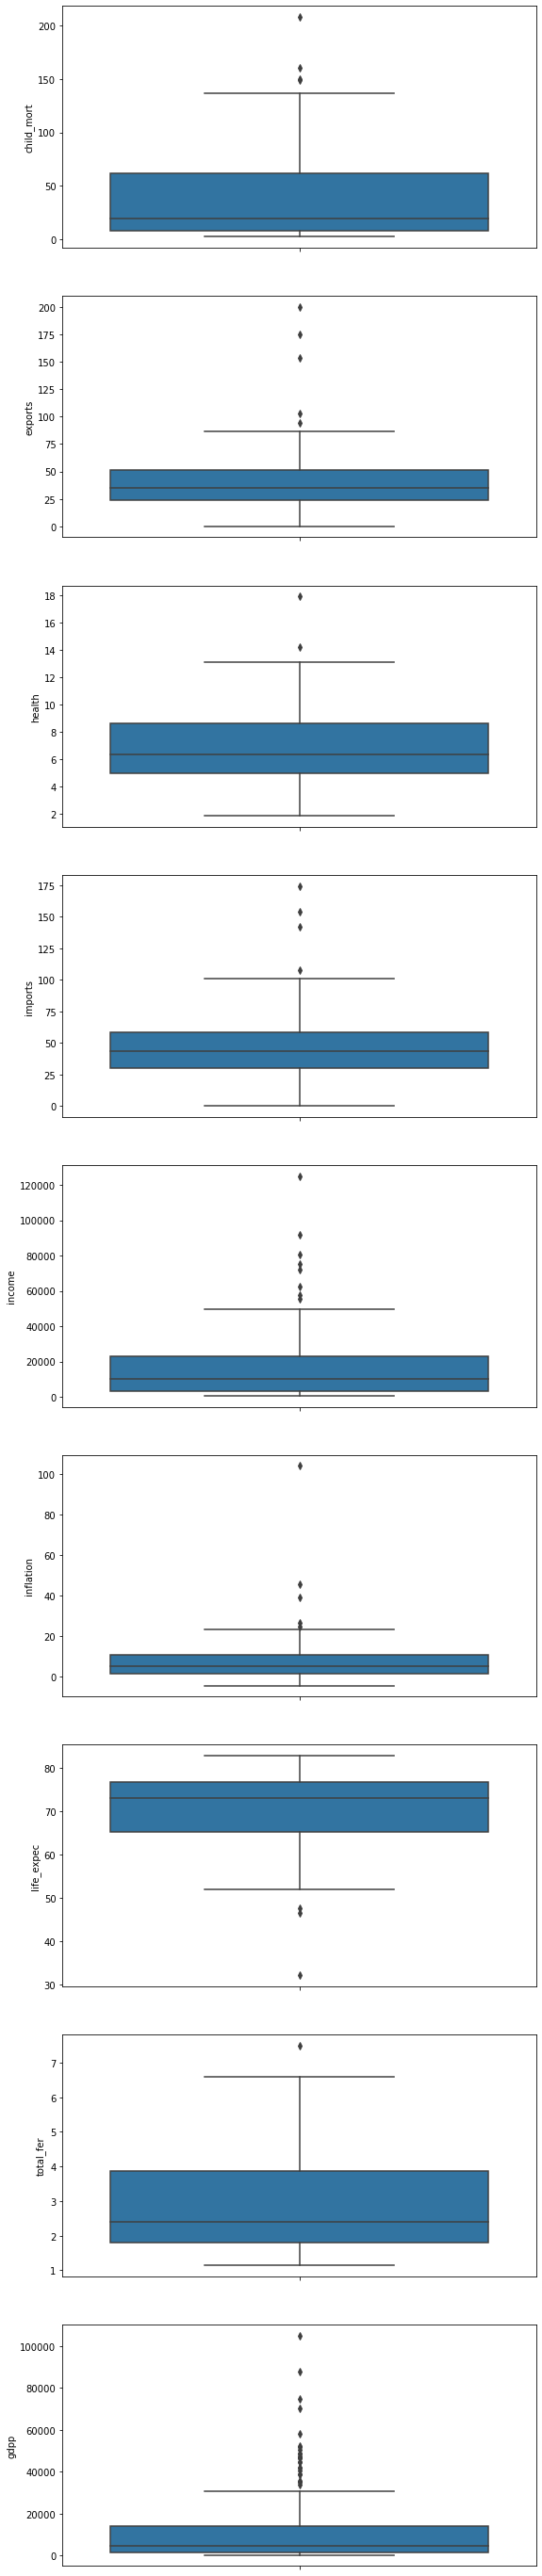

In [12]:
column_names=df.drop('country',axis=1).columns
fig,axes = plt.subplots(nrows=len(column_names), figsize=(9,50))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

In [15]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [16]:
for col in df.drop('country',axis=1).columns:
    lowerbound,upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min = lowerbound,a_max = upperbound)

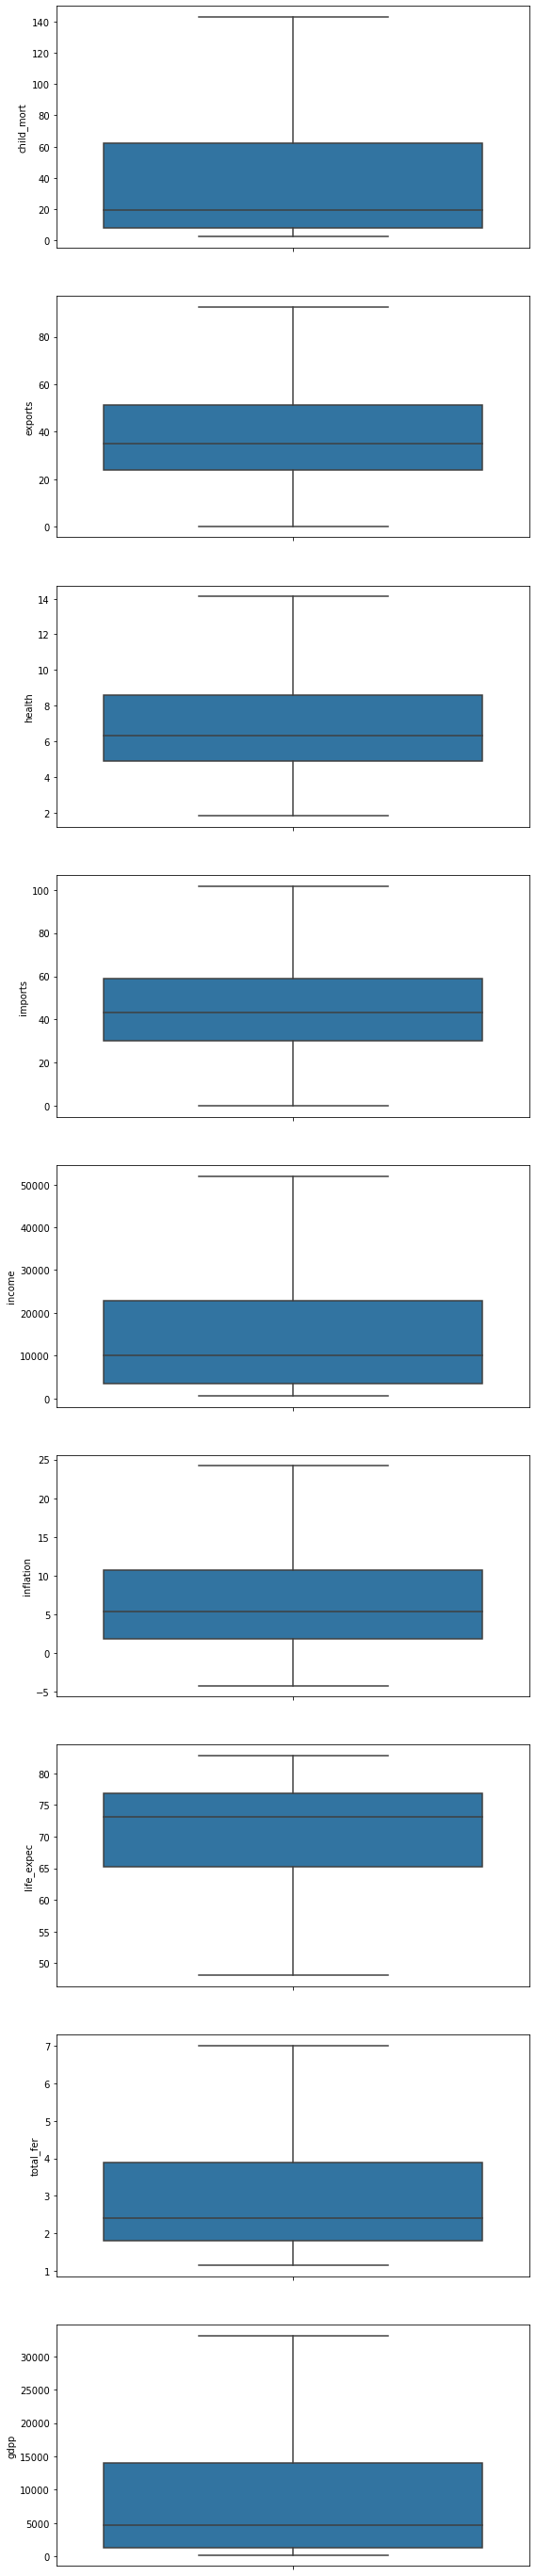

In [17]:
column_names=df.drop('country',axis=1).columns
fig,axes = plt.subplots(nrows=len(column_names), figsize=(9,50))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.698204,38.443293,2.6000,8.250,19.30,62.10,142.8750
exports,167.0,39.543557,21.301318,0.1090,23.800,35.00,51.35,92.6750
health,167.0,6.792575,2.668103,1.8100,4.920,6.32,8.60,14.1200
imports,167.0,45.862071,20.338815,0.0659,30.200,43.30,58.75,101.5750
income,167.0,15921.574850,15207.197459,609.0000,3355.000,9960.00,22800.00,51967.5000
inflation,167.0,7.065066,6.704968,-4.2100,1.810,5.39,10.75,24.1600
life_expec,167.0,70.663772,8.522535,48.0500,65.300,73.10,76.80,82.8000
total_fer,167.0,2.945075,1.505564,1.1500,1.795,2.41,3.88,7.0075
gdpp,167.0,10351.281437,11612.044330,231.0000,1330.000,4660.00,14050.00,33130.0000


<AxesSubplot:>

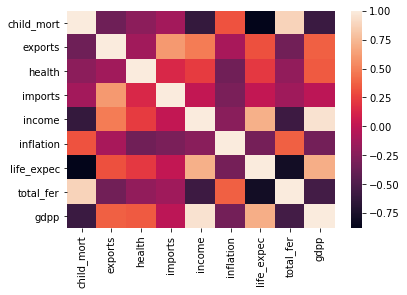

In [19]:
sns.heatmap(df.corr())

In [23]:
categorical_columns = []
for col in df.drop('country',axis=1).columns:
        
    print(col,':',df[col].value_counts().count())
    if df[col].value_counts().count() < 20:
        categorical_columns.append(col)
        
categorical_columns        

child_mort : 136
exports : 143
health : 146
imports : 148
income : 149
inflation : 152
life_expec : 125
total_fer : 138
gdpp : 133


[]

In [24]:
df_country = df['country']

In [25]:
df.set_index('country',inplace = True)

In [26]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [27]:
df2 = df

In [28]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler().fit(df)
df_scaled = rc.transform(df)
df_scaled

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_scaled_pca = pca.fit_transform(df_scaled)
df_scaled_pca

array([[-2.35599001, -0.37005504],
       [ 0.14671397, -0.11321079],
       [-0.38546281, -0.28423578],
       [-2.31319715,  0.84034394],
       [ 0.87898283,  0.42385543],
       [-0.03683209, -1.49175073],
       [-0.32091104, -0.21533087],
       [ 2.230989  , -1.72953507],
       [ 2.76496725, -0.45864778],
       [-0.20169606, -0.19021746],
       [ 1.48484352, -0.50347604],
       [ 1.68101384,  0.56159607],
       [-1.07500622, -0.73038078],
       [ 0.99924594, -0.09543189],
       [ 0.22558541,  0.75926061],
       [ 2.8902538 ,  0.79801972],
       [ 0.05323451,  0.97629377],
       [-2.05954631, -0.01201804],
       [-0.35993173,  0.92309428],
       [-0.77574909,  0.02615376],
       [ 0.59225569, -0.24258019],
       [-0.70923692,  0.35544659],
       [ 0.15686462, -1.68448034],
       [ 2.09932628, -0.27393831],
       [ 0.64390913,  0.48305449],
       [-2.42518368, -0.45430947],
       [-2.35906241, -0.78334508],
       [-0.65345645,  1.0351861 ],
       [-2.13716277,

In [30]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3,random_state=42).fit(df_scaled_pca)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [32]:
km_model.cluster_centers_

array([[ 0.13210913,  0.25673052],
       [-1.83282542, -0.15602411],
       [ 2.35046875, -0.31078303]])

In [34]:
km_model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1])

Text(0.5, 1.0, 'K-Means Clustering')

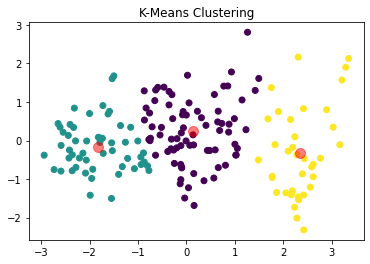

In [35]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=km_model.labels_,cmap='viridis')
centers = km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,alpha=0.5)
plt.title('K-Means Clustering')

In [36]:
df_kmeans=df.copy()
df_kmeans['Developed_status'] = km_model.labels_
df_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


In [41]:
df_kmeans.reset_index(inplace=True)

In [42]:
df_kmeans.groupby('Developed_status')[['country']].sum()

,country
Developed_status,
0,AlbaniaAlgeriaAntigua and BarbudaArgentinaArme...
1,AfghanistanAngolaBangladeshBeninBurkina FasoBu...
2,AustraliaAustriaBahamasBahrainBelgiumBruneiCan...


In [43]:
df_kmeans.groupby(['Developed_status','country']).agg({'country':'size'})

country
Developed_status country                                
0                Albania                               1
                 Algeria                               1
                 Antigua and Barbuda                   1
                 Argentina                             1
                 Armenia                               1
                 Azerbaijan                            1
                 Barbados                              1
                 Belarus                               1
                 Belize                                1
                 Bhutan                                1
                 Bolivia                               1
                 Bosnia and Herzegovina                1
                 Botswana                              1
                 Brazil                                1
                 Bulgaria                              1
                 Cambodia                              1
                 Cape Verde                            1
                 Chile                                 1
                 China                                 1
                 Colombia                              1
                 Costa Rica                            1
                 Croatia                               1
                 Dominican Republic                    1
                 Ecuador                               1
                 El Salvador                           1
                 Equatorial Guinea                     1
                 Estonia                               1
                 Fiji                                  1
                 Georgia                               1
                 Grenada                               1
                 Guatemala                             1
                 Guyana                                1
                 Hungary                               1
                 Iran                                  1
                 Jamaica                               1
                 Jordan                                1
                 Kazakhstan                            1
                 Kyrgyz Republic                       1
                 Latvia                                1
                 Lebanon                               1
                 Libya                                 1
                 Lithuania                             1
                 Macedonia, FYR                        1
                 Malaysia                              1
                 Maldives                              1
                 Mauritius                             1
                 Micronesia, Fed. Sts.                 1
                 Moldova                               1
                 Mongolia                              1
                 Montenegro                            1
                 Morocco                               1
                 Namibia                               1
                 Oman                                  1
                 Panama                                1
                 Paraguay                              1
                 Peru                                  1
                 Philippines                           1
                 Poland                                1
                 Romania                               1
                 Russia                                1
                 Samoa                                 1
                 Saudi Arabia                          1
                 Serbia                                1
                 Seychelles                            1
                 Solomon Islands                       1
                 St. Vincent and the Grenadines        1
                 Suriname                              1
                 Thailand                              1
                 Tonga                                 1
  

In [44]:
replace_values = {0:'Developing',1:'Under-Developing',2:'Developed'}
final_df_kmeans = df_kmeans.replace({'Developed_status':replace_values})
final_df_kmeans.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_status
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,Under-Developing
1,1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,Developing
2,2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,Developing
3,3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,Under-Developing
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,Developing


In [45]:
print('Under Developing Countries')
final_df_kmeans.loc[:,['country']][final_df_kmeans.Developed_status=='Under-Developing']

Under Developing Countries


,country
0,Afghanistan
3,Angola
12,Bangladesh
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [46]:
print('Developing Countries')
final_df_kmeans.loc[:,['country']][final_df_kmeans.Developed_status=='Developing']

Developing Countries


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
9,Azerbaijan
13,Barbados
14,Belarus
16,Belize
18,Bhutan


In [47]:
print('Developed Countries')
final_df_kmeans.loc[:,['country']][final_df_kmeans.Developed_status=='Developed']

Developed Countries


,country
7,Australia
8,Austria
10,Bahamas
11,Bahrain
15,Belgium
23,Brunei
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark


In [48]:
final_df_kmeans.Developed_status.value_counts()

Developing          77
Under-Developing    53
Developed           37
Name: Developed_status, dtype: int64

Hierachical

In [50]:
from sklearn.cluster import AgglomerativeClustering as AC
hier_model = AC(n_clusters=3,affinity='euclidean',linkage='ward')
label_pred_hierachical = hier_model.fit_predict(df_scaled_pca)

Text(0.5, 1.0, 'Hierachical Clustering')

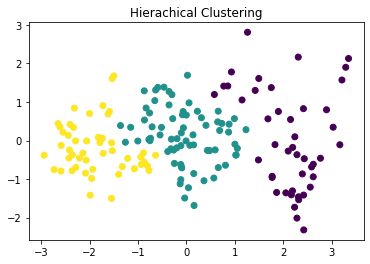

In [52]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=label_pred_hierachical,cmap='viridis')
plt.title('Hierachical Clustering')

In [53]:
label_pred_hierachical

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2], dtype=int64)

In [54]:
df_hier = df.copy()
df_hier['Developed_status'] = label_pred_hierachical
df_hier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,1


In [55]:
df_hier.reset_index(inplace=True)

In [56]:
df_hier.groupby('Developed_status')[['country']].sum()

,country
Developed_status,
0,AustraliaAustriaBahamasBahrainBelgiumBruneiCan...
1,AlbaniaAlgeriaAntigua and BarbudaArgentinaArme...
2,AfghanistanAngolaBangladeshBeninBurkina FasoBu...


In [57]:
df_hier.groupby(['Developed_status','country']).agg({'country':'size'})

country
Developed_status country                                
0                Australia                             1
                 Austria                               1
                 Bahamas                               1
                 Bahrain                               1
                 Belgium                               1
                 Brunei                                1
                 Canada                                1
                 Cyprus                                1
                 Czech Republic                        1
                 Denmark                               1
                 Estonia                               1
                 Finland                               1
                 France                                1
                 Germany                               1
                 Greece                                1
                 Hungary                               1
                 Iceland                               1
                 Ireland                               1
                 Israel                                1
                 Italy                                 1
                 Japan                                 1
                 Kuwait                                1
                 Lithuania                             1
                 Luxembourg                            1
                 Malaysia                              1
                 Maldives                              1
                 Malta                                 1
                 Netherlands                           1
                 New Zealand                           1
                 Norway                                1
                 Panama                                1
                 Portugal                              1
                 Qatar                                 1
                 Seychelles                            1
                 Singapore                             1
                 Slovak Republic                       1
                 Slovenia                              1
                 South Korea                           1
                 Spain                                 1
                 Sweden                                1
                 Switzerland                           1
                 Thailand                              1
                 United Arab Emirates                  1
                 United Kingdom                        1
                 United States                         1
1                Albania                               1
                 Algeria                               1
                 Antigua and Barbuda                   1
                 Argentina                             1
                 Armenia                               1
                 Azerbaijan                            1
                 Barbados                              1
                 Belarus                               1
                 Belize                                1
                 Bhutan                                1
                 Bolivia                               1
                 Bosnia and Herzegovina                1
                 Botswana                              1
                 Brazil                                1
                 Bulgaria                              1
                 Cambodia                              1
                 Cape Verde                            1
                 Chile                                 1
                 China                                 1
                 Colombia                              1
                 Costa Rica                            1
                 Croatia                               1
                 Dominican Republic                    1
                 Ecuador                               1
  

In [58]:
replace_values = {1:'Developing',2:'Under-Developing',0:'Developed'}
final_df_hier = df_hier.replace({'Developed_status':replace_values})
final_df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Developed_status
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,Under-Developing
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,Under-Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,Developing


In [59]:
print('Under Developing Countries')
final_df_hier.loc[:,['country']][final_df_hier.Developed_status=='Under-Developing']

Under Developing Countries


,country
0,Afghanistan
3,Angola
12,Bangladesh
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [60]:
print('Developing Countries')
final_df_hier.loc[:,['country']][final_df_hier.Developed_status=='Developing']

Developing Countries


,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
9,Azerbaijan
13,Barbados
14,Belarus
16,Belize
18,Bhutan


In [61]:
print('Developed Countries')
final_df_hier.loc[:,['country']][final_df_hier.Developed_status=='Developed']

Developed Countries


,country
7,Australia
8,Austria
10,Bahamas
11,Bahrain
15,Belgium
23,Brunei
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark


In [62]:
final_df_hier.Developed_status.value_counts()

Developing          72
Under-Developing    50
Developed           45
Name: Developed_status, dtype: int64

Version 2

In [63]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [64]:
social = df2[['child_mort','health','life_expec','total_fer']]
financial = df2[['exports','imports','income','inflation','gdpp']]

In [65]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler().fit(social)
social_scaled = rc.transform(social)
social_scaled

array([[ 1.31662024e+00,  3.42391304e-01, -1.46956522e+00,
         1.63549161e+00],
       [-5.01392758e-02,  6.25000000e-02,  2.78260870e-01,
        -3.64508393e-01],
       [ 1.48560817e-01, -5.84239130e-01,  2.95652174e-01,
         2.30215827e-01],
       [ 1.85143918e+00, -9.42934783e-01, -1.13043478e+00,
         1.79856115e+00],
       [-1.67130919e-01, -7.88043478e-02,  3.21739130e-01,
        -1.34292566e-01],
       [-8.91364903e-02,  4.83695652e-01,  2.34782609e-01,
        -1.91846523e-02],
       [-2.22841226e-02, -5.21739130e-01,  1.73913043e-02,
        -3.45323741e-01],
       [-2.69266481e-01,  6.54891304e-01,  7.73913043e-01,
        -2.30215827e-01],
       [-2.78551532e-01,  1.27173913e+00,  6.43478261e-01,
        -4.65227818e-01],
       [ 3.69545032e-01, -1.19565217e-01, -3.47826087e-01,
        -2.35011990e-01],
       [-1.02135562e-01,  4.26630435e-01,  6.08695652e-02,
        -2.63788969e-01],
       [-1.98700093e-01, -3.66847826e-01,  2.52173913e-01,
      

In [66]:
rc = RobustScaler().fit(financial)
financial_scaled = rc.transform(financial)
financial_scaled

array([[-9.07441016e-01,  5.60420315e-02, -4.29416302e-01,
         4.53020134e-01, -3.22877358e-01],
       [-2.54083485e-01,  1.85639229e-01, -1.54281306e-03,
        -1.00671141e-01, -4.48113208e-02],
       [ 1.23411978e-01, -4.16812609e-01,  1.51195680e-01,
         1.19798658e+00, -1.57232704e-02],
       [ 9.90925590e-01, -1.40105079e-02, -2.08794034e-01,
         1.90268456e+00, -8.88364780e-02],
       [ 3.81125227e-01,  5.46409807e-01,  4.70043713e-01,
        -4.41834452e-01,  5.92767296e-01],
       [-5.84392015e-01, -9.56217163e-01,  4.49472872e-01,
         1.73489933e+00,  4.43396226e-01],
       [-5.15426497e-01,  7.00525394e-02, -1.67652353e-01,
         2.66219239e-01, -1.13207547e-01],
       [-5.51724138e-01, -7.84588441e-01,  1.61686809e+00,
        -4.73154362e-01,  2.23820755e+00],
       [ 5.91651543e-01,  1.57618214e-01,  1.70943687e+00,
        -5.05257271e-01,  2.23820755e+00],
       [ 7.00544465e-01, -7.91593695e-01,  3.10619697e-01,
         9.40715884e-01

In [67]:
social.head()

,child_mort,health,life_expec,total_fer
country,,,,
Afghanistan,90.2,7.58,56.2,5.82
Albania,16.6,6.55,76.3,1.65
Algeria,27.3,4.17,76.5,2.89
Angola,119.0,2.85,60.1,6.16
Antigua and Barbuda,10.3,6.03,76.8,2.13


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
social_scaled_pca = pca.fit_transform(social_scaled)
social_scaled_pca

array([[ 1.99734994],
       [-0.83506032],
       [-0.27248131],
       [ 2.45524324],
       [-0.77047682],
       [-0.72537218],
       [-0.54161038],
       [-1.28846521],
       [-1.47307088],
       [-0.12894852],
       [-0.75714999],
       [-0.68269359],
       [ 0.15165082],
       [-0.92325271],
       [-0.64912196],
       [-1.31795085],
       [-0.21181835],
       [ 2.00503676],
       [-0.08224633],
       [ 0.22157591],
       [-1.30105984],
       [ 0.73338736],
       [-0.79084362],
       [-0.68640552],
       [-0.81527338],
       [ 2.24397361],
       [ 1.85607653],
       [ 0.34182462],
       [ 2.07519977],
       [-1.46510242],
       [-0.13550238],
       [ 2.9941264 ],
       [ 2.90953547],
       [-1.07390247],
       [-0.69495024],
       [-0.7799452 ],
       [ 1.37524276],
       [ 2.37827367],
       [ 1.55820489],
       [-1.2727016 ],
       [ 2.19003002],
       [-1.04483026],
       [-1.18139993],
       [-1.14404944],
       [-1.33276063],
       [-0

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
financial_scaled_pca = pca.fit_transform(financial_scaled)
financial_scaled_pca

array([[-1.41391363],
       [-0.57735875],
       [-0.73978853],
       [-0.7811333 ],
       [ 0.49724943],
       [-0.74683178],
       [-0.92635756],
       [ 1.70466952],
       [ 2.34037928],
       [-0.34750516],
       [ 1.26195948],
       [ 1.71349176],
       [-1.35098907],
       [ 0.47905037],
       [-0.18155968],
       [ 2.73633068],
       [-0.06777932],
       [-1.00713669],
       [-0.50789722],
       [-0.83229778],
       [-0.43264205],
       [-0.25395932],
       [-0.61008174],
       [ 2.27737321],
       [ 0.1488287 ],
       [-1.29657693],
       [-1.57999031],
       [-0.51325632],
       [-1.05700404],
       [ 1.81703265],
       [-0.49461447],
       [-1.30358197],
       [-0.93809489],
       [ 0.08207992],
       [-0.79101101],
       [-0.74487468],
       [-1.12795788],
       [-1.31796533],
       [-0.41967567],
       [-0.3286362 ],
       [-0.68113257],
       [ 0.39517636],
       [ 1.94732356],
       [ 1.54997328],
       [ 2.26567164],
       [-0

In [70]:
social = pd.DataFrame(social_scaled_pca)
financial = pd.DataFrame(financial_scaled_pca)


In [72]:
df3 = pd.concat([financial,social,df_country],axis=1)
df3.head()

,0,0,country
0,-1.413914,1.997350,Afghanistan
1,-0.577359,-0.835060,Albania
2,-0.739789,-0.272481,Algeria
3,-0.781133,2.455243,Angola
4,0.497249,-0.770477,Antigua and Barbuda


In [73]:
df3.set_index('country',inplace=True)

In [75]:
columns = ('fin_value','soc_value')
df3.columns = columns
df3.head()

,fin_value,soc_value
country,,
Afghanistan,-1.413914,1.997350
Albania,-0.577359,-0.835060
Algeria,-0.739789,-0.272481
Angola,-0.781133,2.455243
Antigua and Barbuda,0.497249,-0.770477


In [76]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3,random_state=42).fit(df3)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

Text(0.5, 1.0, 'K-Means Clustering')

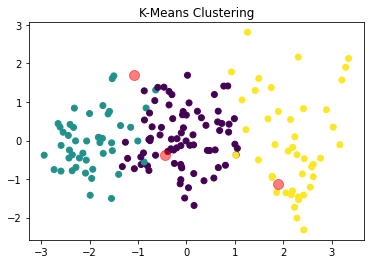

In [77]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=km_model.labels_,cmap='viridis')
centers = km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,alpha=0.5)
plt.title('K-Means Clustering')

In [78]:
df3_kmeans=df3.copy()
df3_kmeans['Developed_status'] = km_model.labels_
df3_kmeans.head()

,fin_value,soc_value,Developed_status
country,,,
Afghanistan,-1.413914,1.997350,1
Albania,-0.577359,-0.835060,0
Algeria,-0.739789,-0.272481,0
Angola,-0.781133,2.455243,1
Antigua and Barbuda,0.497249,-0.770477,0


In [79]:
df3_kmeans.Developed_status.value_counts()

0    77
1    46
2    44
Name: Developed_status, dtype: int64